In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.listdir()

['.config', 'student_data.csv', 'sample_data']

In [4]:
import pandas as pd
df = pd.read_csv("student_data.csv")
print("CSV loaded")


CSV loaded


In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
import os
os.listdir()

['.config', 'student_data.csv', 'sample_data']

In [7]:
import pandas as pd

df = pd.read_csv("student_data.csv")
print("CSV loaded successfully")

CSV loaded successfully


In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Dataset: Student Performance
Shape: 5 rows x 33 columns
Interesting columns: Dalc, Walc

day 2 summary:
Set up Google Colab -
Fixed CSV loading issues -
Successfully viewed dataset -
Learning feels slow but stable

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
df.select_dtypes(include = 'number').columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

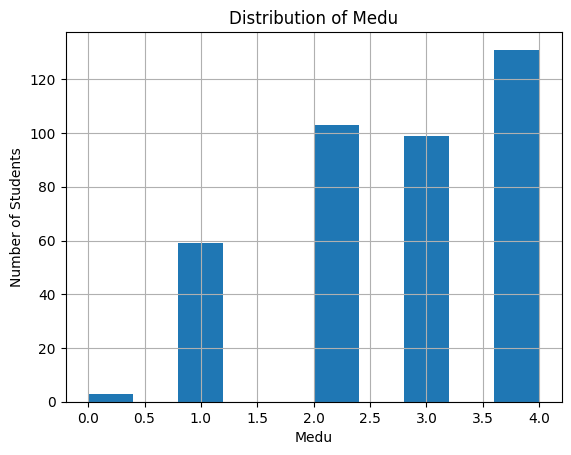

In [11]:
import matplotlib.pyplot as plt

plt.figure()
df['Medu'].hist()
plt.title("Distribution of Medu")
plt.xlabel("Medu")
plt.ylabel("Number of Students")
plt.show()


In [12]:
df.groupby('Medu')['G3'].mean()


,G3
Medu,
0,13.000000
1,8.677966
2,9.728155
3,10.303030
4,11.763359


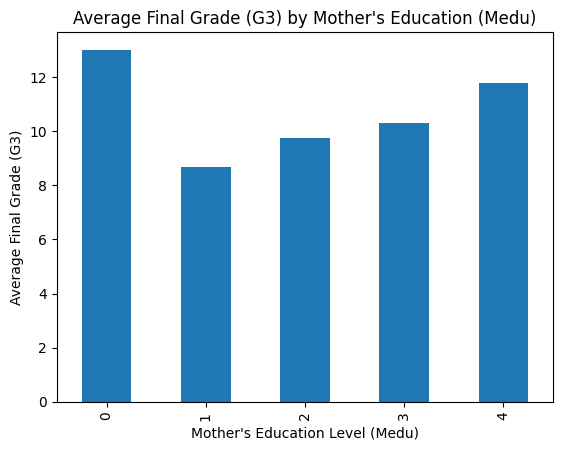

In [13]:
import matplotlib.pyplot as plt

medu_g3 = df.groupby('Medu')['G3'].mean()

plt.figure()
medu_g3.plot(kind='bar')
plt.title("Average Final Grade (G3) by Mother's Education (Medu)")
plt.xlabel("Mother's Education Level (Medu)")
plt.ylabel("Average Final Grade (G3)")
plt.show()


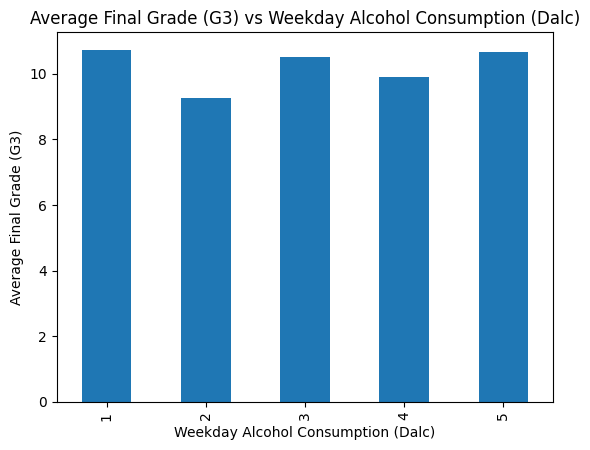

In [14]:
import matplotlib.pyplot as plt

dalc_g3 = df.groupby('Dalc')['G3'].mean()

plt.figure()
dalc_g3.plot(kind='bar')
plt.title("Average Final Grade (G3) vs Weekday Alcohol Consumption (Dalc)")
plt.xlabel("Weekday Alcohol Consumption (Dalc)")
plt.ylabel("Average Final Grade (G3)")
plt.show()

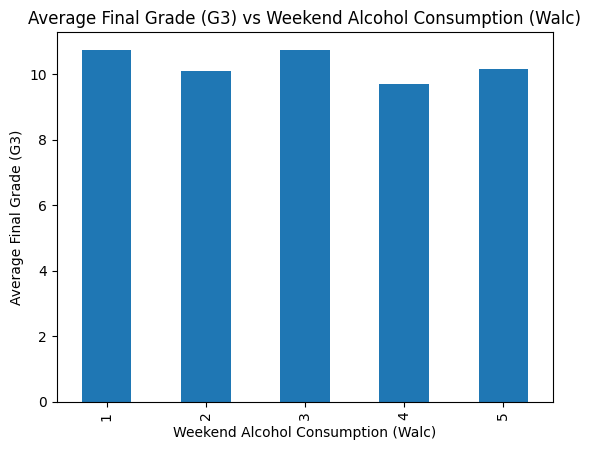

In [15]:
walc_g3 = df.groupby('Walc')['G3'].mean()

plt.figure()
walc_g3.plot(kind='bar')
plt.title("Average Final Grade (G3) vs Weekend Alcohol Consumption (Walc)")
plt.xlabel("Weekend Alcohol Consumption (Walc)")
plt.ylabel("Average Final Grade (G3)")
plt.show()


In [16]:
df[['G1','G2','G3']].corr()

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


Day 3:Loaded a real-world dataset-Explored social behavior vs academic outcome-Visualized Dalc/Walc vs G3-Discovered weak correlation (your “damn” moment)- Understood that intuition ≠ data truth

In [17]:
x = df[['G1','G2']]
y = df['G3']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
   x , y, test_size = 0.2, random_state = 42
)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

1.262230697901814

day 4: EDA understanding-First ML model-Interpreting MAE-Asking the right questions

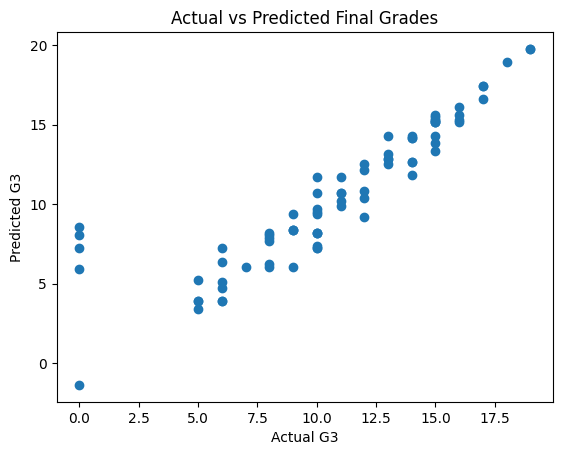

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades")
plt.show()

In [24]:
x2 = df[['G1','G2','Medu']]
y2 = df['G3']

x2_train, x2_test, y2_train , y2_test = train_test_split(
    x2, y2, test_size = 0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(x2_train, y2_train)

y2_pred = model2.predict(x2_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y2_test, y2_pred)

1.2591673360053803

Day 5: Done EDA-Built an ML regression model-Evaluated it using MAE-Interpreted predictions visually-Tested feature impact